In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

## Занятие 8
## Математический анализ
## Дифференцирование функции, заданной параметрически
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
тогда производная $y$ по $x$  находится по формуле
$$
y'_x = \frac{y'_t}{x'_t} = \frac{\psi'_t}{\varphi'_t}
$$
Вторая производная:
$$
y''_{xx} = \frac{x'_t y''_{tt}-x''_{tt}y'_t}{(x'_t)^3}  = \frac{\varphi'_t \psi''_{tt}-\varphi''_{tt}\psi'_t}{(\varphi'_t)^3}
$$
### Задание 1
Найти производные 1 и 2 порядка функции
$$
\left\{
\begin{matrix}
x = \sin(t) - t\cos(t)\\
y = \cos(t) + t\sin(t)
\end{matrix}
\right.
$$

In [ ]:
t = Symbol("t")
x = Sin(t) - Cos(t)
y = Cos(t) + t*Sin(t)
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
display(dy_x, simplify(dy2_xx))

t*cos(t)/(sin(t) + cos(t))

(-2*sqrt(2)*t + 2*sin(2*t + pi/4) + sqrt(2))/(8*sin(t + pi/4)**3)

### Задание 2.
Найти нули производных первого и второго порядка, а также точки, в которых эти производные не существуют, для функции
$$
\left\{
\begin{matrix}
x = t^2 - 2t\\
y = t^2 + 2t
\end{matrix}
\right.
$$

In [ ]:
t = Symbol("t")
x = t**2 - 2*t
y = t**2 + 2*t
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy / dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3

dy_x_num, dy_x_den = fraction(dy_x)
dy_x_num_nul = solveset(dy_x_num)
dy_x_den_nul = solveset(dy_x_den)
display('Первая производная, нули числителя:', dy_x_num_nul, 'нули знаменателя:', dy_x_den_nul)

dy2_xx_num,dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
display('Вторая производная, нули числителя:', dy2_xx_num_nul, 'нули знаменателя:', dy2_xx_den_nul)

'Первая производная, нули числителя:'

{-1}

'нули знаменателя:'

{1}

'Вторая производная, нули числителя:'

EmptySet

'нули знаменателя:'

{1}

### Задание 3.
Найти точки экстремума и точки перегиба функции Задания 2.

**Находим точки экстремума**

In [ ]:
max_arr=[]
min_arr=[]
crit_points_interval = [-1, 1]
points = [-2, 0, 2]
for i, item in enumerate(crit_points_interval):
 if item in dy_x_num_nul:
  df_left = dy_x.subs(t, points[i])
  df_right = dy_x.subs(t, points[i + 1])
  x_left = float(x.subs(t, points[i]))
  x_right = float(x.subs(t, points[i + 1]))
  if df_left < 0 and df_right > 0 and x_left < x_right or df_left > 0 and df_right < 0 and x_left > x_right:
    min_arr.append(item)
  elif df_left < 0 and df_right > 0 and x_left > x_right or df_left > 0 and df_right < 0 and x_left < x_right:
    max_arr.append(item)
display('максимум', max_arr, 'минимум', min_arr)

'максимум'

[]

'минимум'

[-1]

**Посмотрим на графике:**

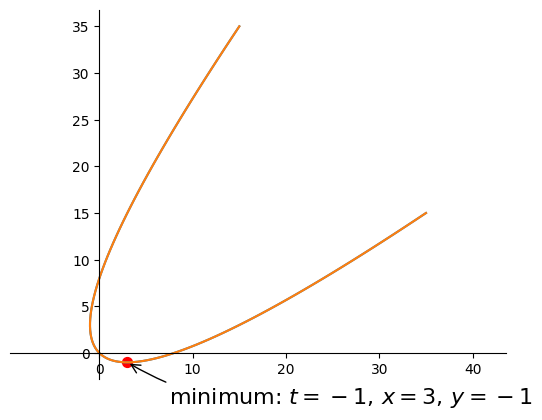

In [ ]:
T = np.linspace(-5, 5, 100)
ax = plt.gca()
X = [x.subs(t, i) for i in T]
Y = [y.subs(t, i) for i in T]
ax.plot(X, Y)
ax.axis('equal')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
for item in max_arr + min_arr:
 if item in max_arr:
  extr = ('maximum:', (10, 30))
 elif item in min_arr:
  extr = ('minimum:', (30, -30))
 x0 = x.subs(t, item)
 y0 = y.subs(t, item)
 ax.scatter([x0], [y0], 50, color='red')
 ax.annotate(extr[0] + r' $t = ' + latex(item) + ',\,x = ' + latex(x0) + ',\,y = ' + latex(y0)+r'$',
 xy=(x0, y0), xycoords='data',xytext=extr[1], textcoords='offset points', fontsize=16,
 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))
ax.plot(X, Y)

**Точки перегиба**

In [ ]:
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
display(dy2_xx)
dy2_xx_num, dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
dy2_xx_points = list((dy2_xx_num_nul.union(dy2_xx_den_nul)).intersect(Interval.Ropen(0, 2*Pi)))
dy2_xx_points.sort()
display(dy2_xx_points)
points = [0, 2]
inflection=[]
for i, item in enumerate(dy2_xx_points):
 if item in dy2_xx_num_nul:
  df_left = dy2_xx.subs(t, points[i])
  df_right = dy2_xx.subs(t, points[i + 1])
  if df_left*df_right < 0:
    inflection.append(item)
display('перегиб ', inflection)


-8/(2*t - 2)**3

[1]

'перегиб '

[]

Так как нету точек в котором вторая производная равна 0, точек перегиба не существуют.

### Задание 4. Точки перегиба
Найти точки перегиба функции, график строить не нужно.
$$
\left\{
\begin{matrix}
x = e^t\\
y = te^{2t}
\end{matrix}
\right.
$$

In [ ]:
x = sympy.E ** t
y = t * sympy.E ** (2*t)
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy / dx
dy2_xx = simplify((dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3)
display(dy2_xx)
dy2_xx_points = [solveset(dy2_xx)]

points = [-3, 0]

inflection=[]
for i, item in enumerate(dy2_xx_points):
  df_left = dy2_xx.subs(t, points[i])
  df_right = dy2_xx.subs(t, points[i + 1])
  if df_left*df_right < 0:
    inflection.append(item)
display('перегиб:', inflection)

2*t + 3

'перегиб:'

[{-3/2}]

## Асимптоты параметрически заданной функции
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
Сначала нужно определить, нет ли таких значений параметра $t$, при которых одна из функций $\varphi(t)$ или $\psi(t)$ обращается в бесконечность, а другая остается конечной. При $\varphi(t_0) = \infty$, а $\psi(t_0) = c$ кривая имеет горизонтальную асимптоту  $y = c$. При  $\psi(t_0) = \infty$, а $\varphi(t_0) = c$ кривая имеет вертикальную асимптоту $x = c$.

Если $\varphi(t_0) = \psi(t_0) = \infty$ и
$$
\lim_{t\to t_0} \frac{\psi(t)}{\varphi(t)} = k;\qquad \lim_{t\to t_0} [\psi(t) - k\varphi(t)] = b,
$$
то   кривая имеет наклонную асимптоту  $y = kx + b$.

### Индивидуальное задание.
Найти асимптоты параметрически заданной функции и изобразить на графике функцию и ее асимптоты.

 Вариант 31

$x = \sqrt{5 t + 7}$

$y = 3 + 3 / t$

In [ ]:
print("t-> +oo:")
display(limit(x, t, +sympy.oo))
display(limit(y, t, +sympy.oo))
print('-'*10)
print("t -> 0:")
display(limit(x, t, 0))
display(limit(y, t, 0))

t-> +oo:


oo

3

----------
t -> 0:


7/2

oo

Значит, кривая имеет горизонтальную асимптоту 𝑦 = 3 и вертикальную асимптоту 𝑥 = 3.5.

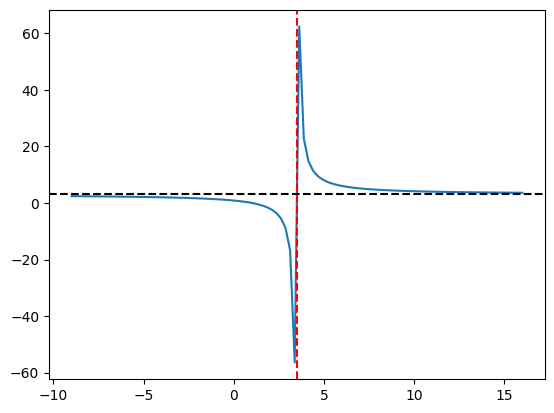

In [ ]:
T = np.linspace(-5, 5, 100)
X = [x.subs(t, i) for i in T]
Y = [y.subs(t, i) for i in T]
plt.plot(X, Y)
plt.axhline(y=3, color='black', linestyle='--')
plt.axvline(x=3.5, color='red', linestyle='--')
plt.show()